<a href="https://colab.research.google.com/github/Suman-Adhikary/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries.

---



---



In [218]:
!pip install catboost
!pip install feature_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from scipy.stats import kstest
import statsmodels.api as sm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from pickle import dump, load

# Dataset.

---



---



In [219]:
dataset = pd.read_csv('diabetes.csv')
dataset.shape

(100000, 9)

In [220]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Variable.

---



---



In [221]:
with open('variable.txt') as f:
  print(f.read())

Age: Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

Gender: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

Body Mass Index (BMI): BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can le

# Exploratory data analysis(EDA).

---



---



In [222]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [223]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [224]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Remove Duplicate.

---



In [225]:
duplicate_rows_data = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [226]:
dataset = dataset.drop_duplicates()

In [227]:
dataset.shape

(96146, 9)

## Univariate analysis.

---



### Gender.

---



In [228]:
dataset['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

### Smoking history.

---



In [229]:
dataset['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

### Hypertension.

---



In [230]:
dataset['hypertension'].value_counts()

0    88685
1     7461
Name: hypertension, dtype: int64

### Heart disease.

---



In [231]:
dataset['heart_disease'].value_counts()

0    92223
1     3923
Name: heart_disease, dtype: int64

### Diabetes.

---



In [232]:
dataset['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

### Count plot for Univariate.

---



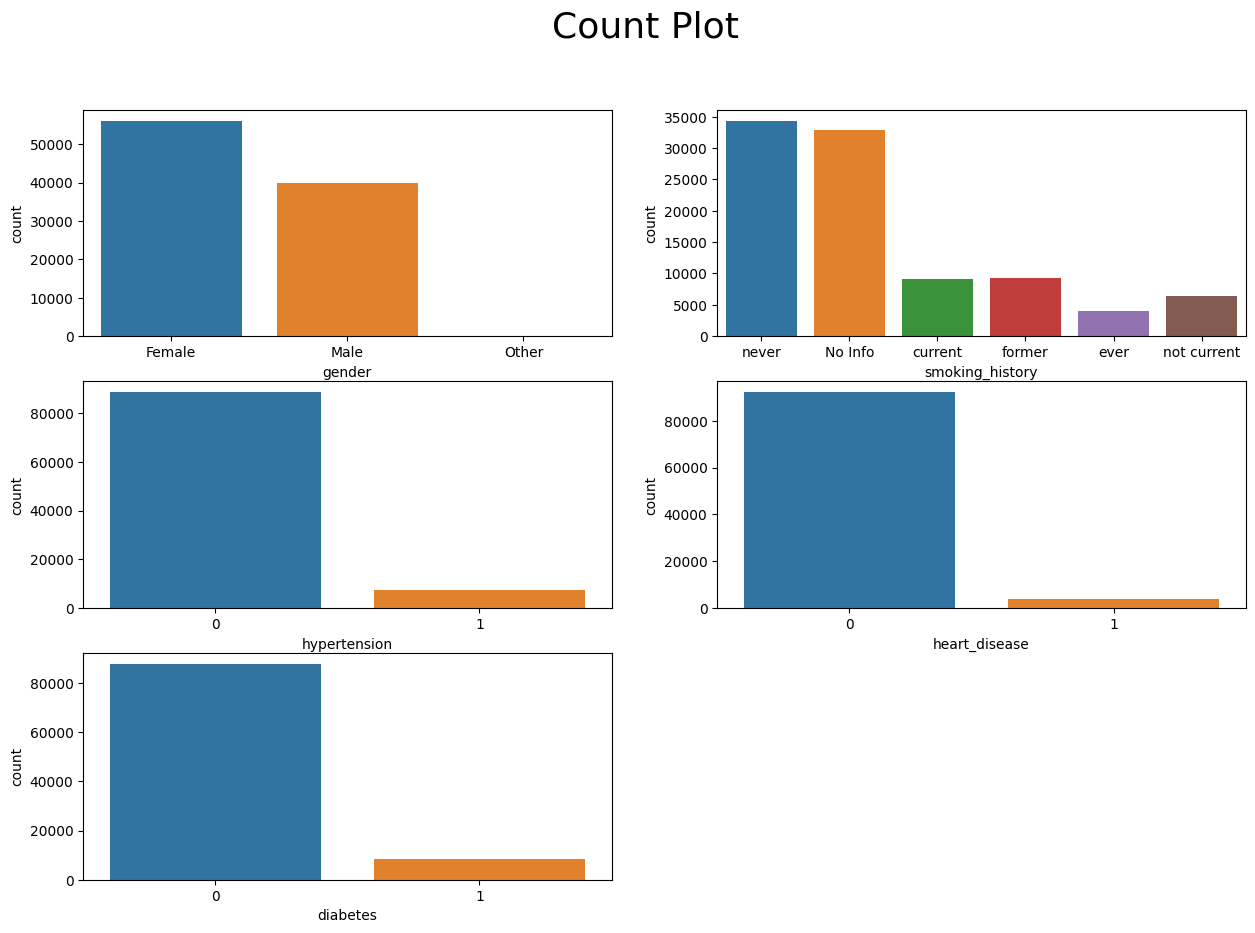

In [233]:
col = ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']

fig, axs = plt.subplots(3, 2, figsize=(15, 10), squeeze=False)

Axis = []
for j in range(3):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.countplot(data = dataset, x = col[i], ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Count Plot", fontsize=26)
plt.show()

### Histogram.

---



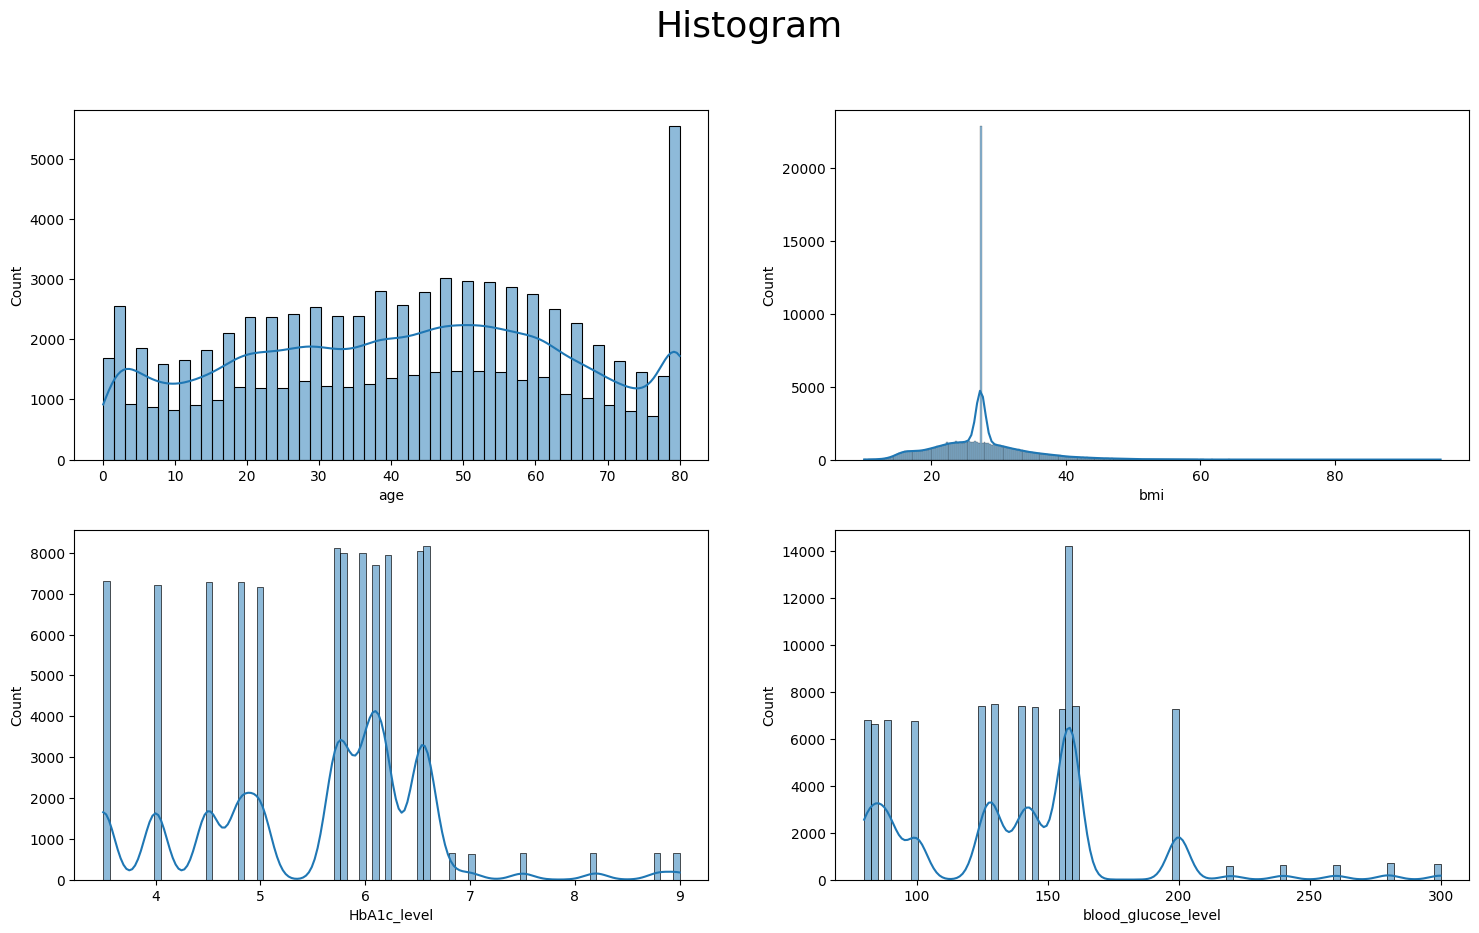

In [234]:
col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(2, 2, figsize=(18, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.histplot(data = dataset, x = col[i], kde = True, ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Histogram", fontsize=26)
plt.show()

### Box plot.

---



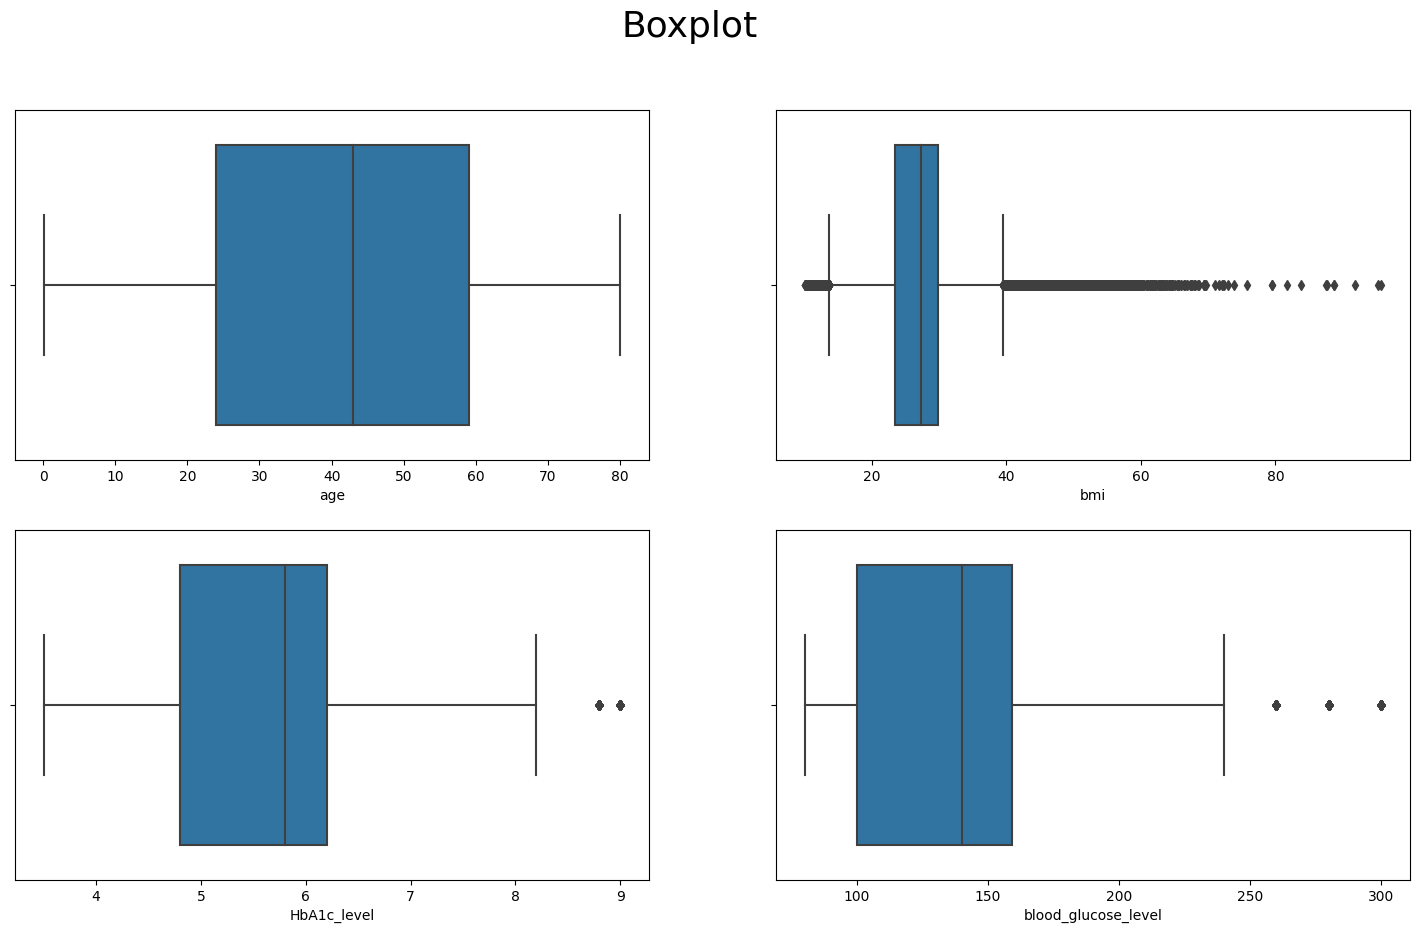

In [235]:
col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(2, 2, figsize=(18, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.boxplot(data = dataset, x = col[i], ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Boxplot", fontsize=26)
plt.show()

## Bivariate analysis.

---



### Diabetes upon Gender group.

---



In [236]:
dataset.groupby('gender')['diabetes'].value_counts()

gender  diabetes
Female  0           51714
        1            4447
Male    0           35932
        1            4035
Other   0              18
Name: diabetes, dtype: int64

### Diabetes upon Smoking.

---



In [237]:
dataset.groupby('smoking_history')['diabetes'].value_counts()

smoking_history  diabetes
No Info          0           31442
                 1            1445
current          0            8249
                 1             948
ever             0            3526
                 1             472
former           0            7709
                 1            1590
never            0           31061
                 1            3337
not current      0            5677
                 1             690
Name: diabetes, dtype: int64

### Diabetes upon Hypertension.

---



In [238]:
dataset.groupby('hypertension')['diabetes'].value_counts()

hypertension  diabetes
0             0           82289
              1            6396
1             0            5375
              1            2086
Name: diabetes, dtype: int64

### Diabetes upon Heart Disease.

---



In [239]:
dataset.groupby('heart_disease')['diabetes'].value_counts()

heart_disease  diabetes
0              0           85008
               1            7215
1              0            2656
               1            1267
Name: diabetes, dtype: int64

### Count plot for Bivariate.

---



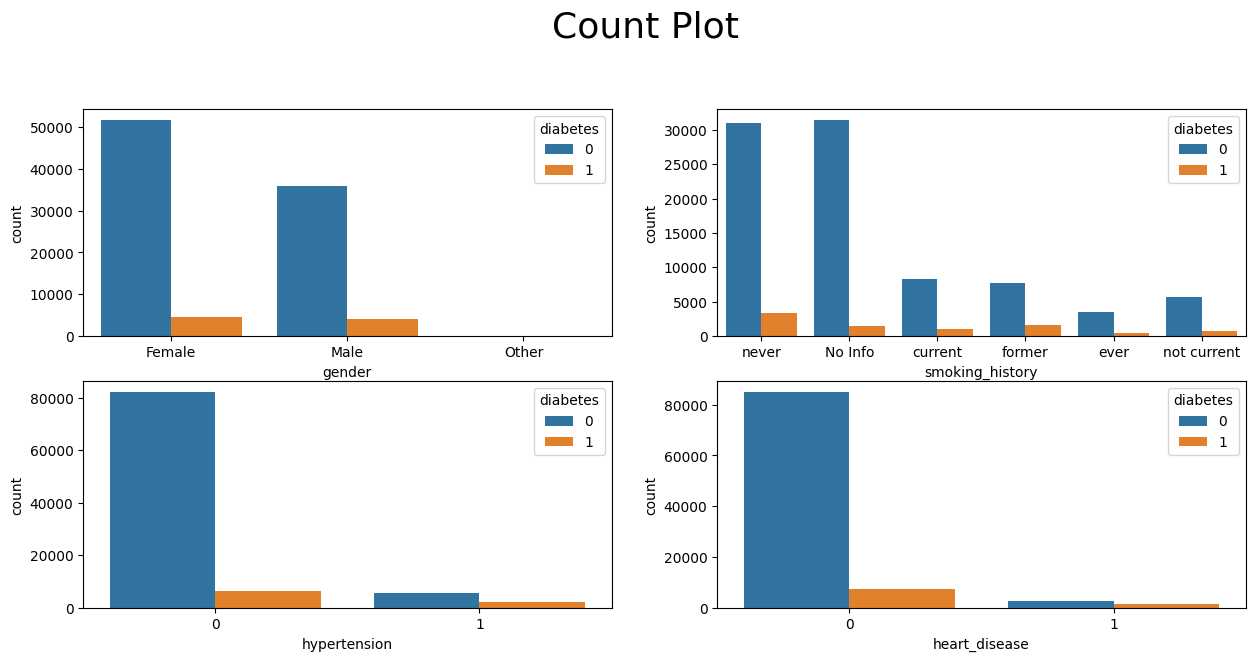

In [240]:
col = ['gender', 'smoking_history', 'hypertension', 'heart_disease']

fig, axs = plt.subplots(3, 2, figsize=(15, 10), squeeze=False)

Axis = []
for j in range(3):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.countplot(data = dataset, x = col[i], hue = 'diabetes', ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Count Plot", fontsize=26)
plt.show()

### Boxplot between BMI and Diabetes with respect to Gender.

---



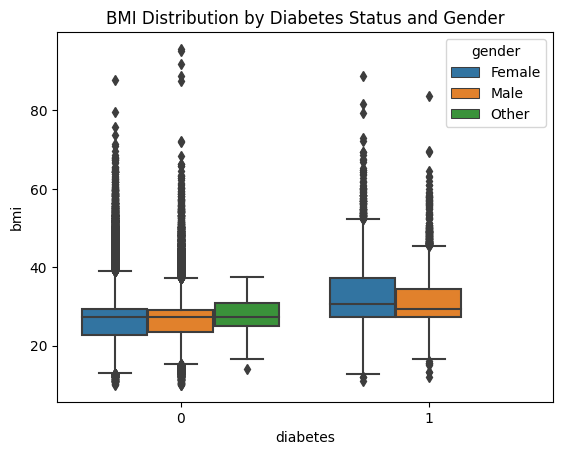

In [241]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=dataset)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

### Boxplot between Age and Diabetes with respect to Gender.

---



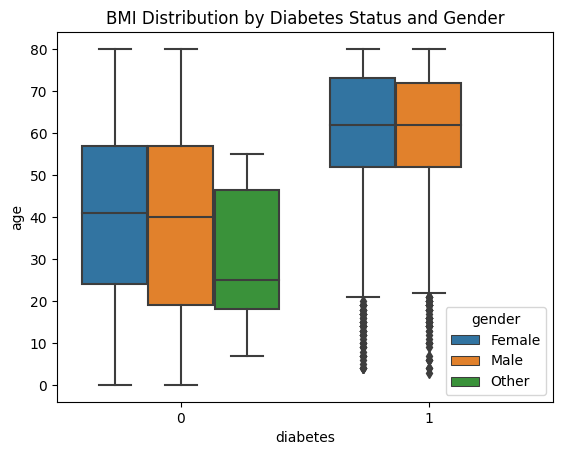

In [242]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=dataset)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

### Violinplot between Diabetes and HbA1c level with respect to Heart Disease.

---



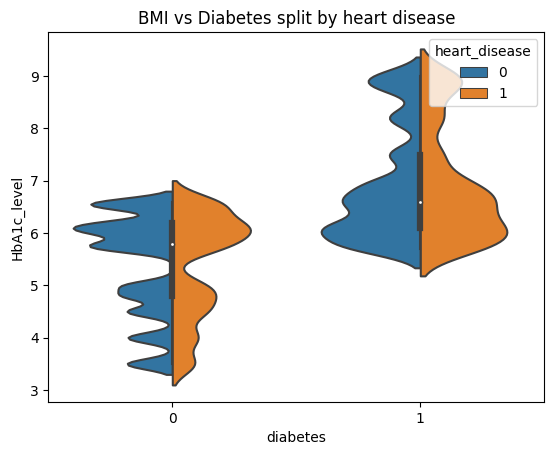

In [243]:
sns.violinplot(x='diabetes', y='HbA1c_level', hue='heart_disease', split=True, data=dataset)
plt.title('BMI vs Diabetes split by heart disease')
plt.show()

### ### Violinplot between Diabetes and Blood Glucose Level with respect to Heart Disease.

---



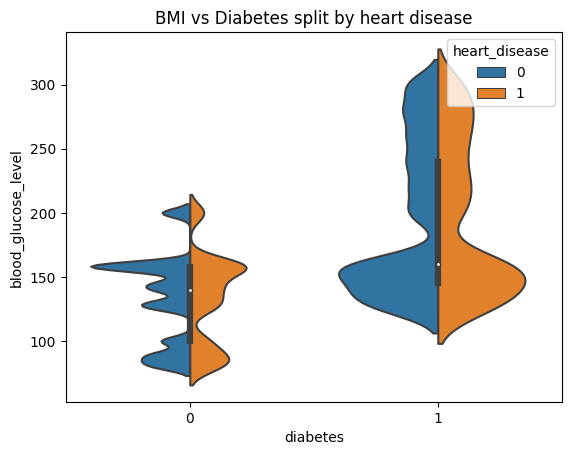

In [244]:
sns.violinplot(x='diabetes', y='blood_glucose_level', hue='heart_disease', split=True, data=dataset)
plt.title('BMI vs Diabetes split by heart disease')
plt.show()

### Scatterplot between Age and BMI with respect to gender.

---



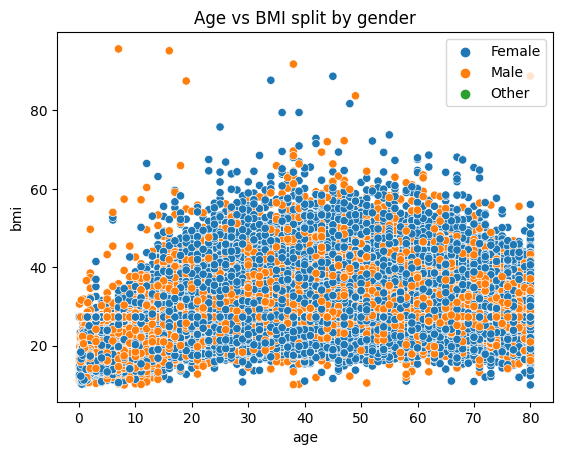

In [245]:
sns.scatterplot(data=dataset, x="age", y="bmi", hue="gender")
plt.title('Age vs BMI split by gender')
plt.legend(loc='best')
plt.show()

### Jointplot between Age and BMI with respect to regression.

---



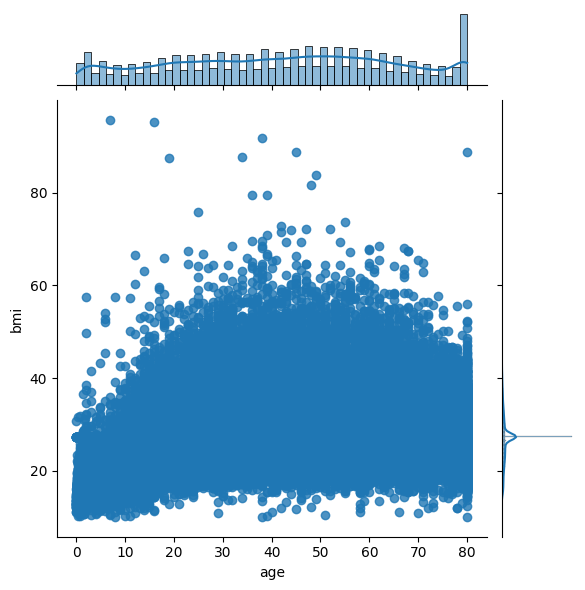

In [246]:
sns.jointplot(data = dataset, x = 'age', y = 'bmi', kind = 'reg')
plt.show()

## Multivariate analysis.

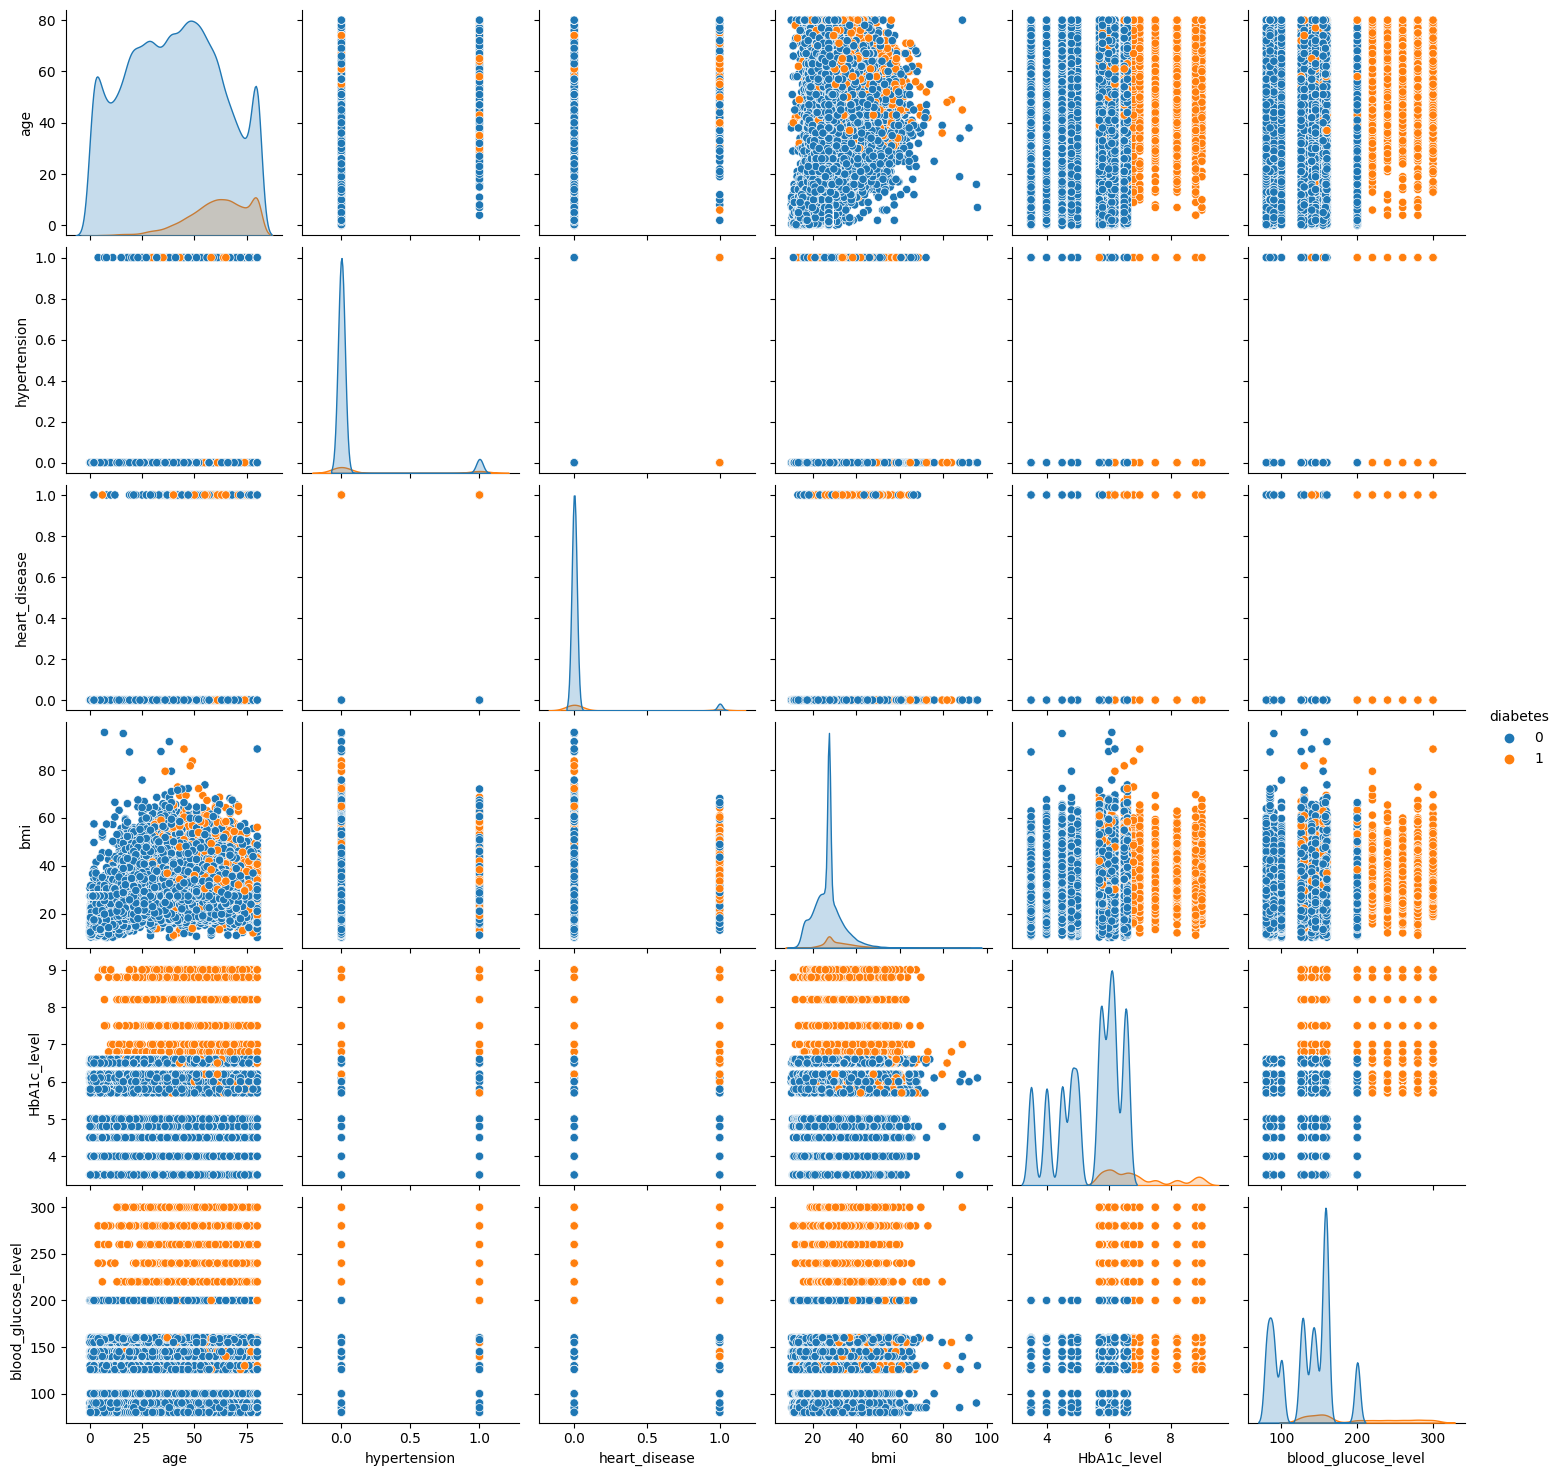

In [247]:
sns.pairplot(dataset, hue = 'diabetes')
plt.show()

# Feature Engineering.

---



---



In [248]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [249]:
dataset['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [250]:
dataset['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

## Remove unwanted value from gender.

---



In [251]:
dataset = dataset[dataset['gender'] != 'Other']

In [252]:
dataset['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [253]:
dataset.shape

(96128, 9)

## Smoking history.

---



In [254]:
CrossTable=pd.crosstab(dataset['diabetes'],dataset['smoking_history'])
CrossTable

smoking_history,No Info,current,ever,former,never,not current
diabetes,,,,,,
0,31436,8249,3525,7709,31058,5669
1,1445,948,472,1590,3337,690


In [255]:
dataset.loc[dataset['smoking_history'] == 'never', 'smoking_history'] = 'non_smoker'
dataset.loc[dataset['smoking_history'] == 'No Info', 'smoking_history'] = 'non_smoker'
dataset.loc[dataset['smoking_history'] == 'current', 'smoking_history'] = 'current'
dataset.loc[dataset['smoking_history'] == 'former', 'smoking_history'] = 'past_smoker'
dataset.loc[dataset['smoking_history'] == 'ever', 'smoking_history'] = 'past_smoker'
dataset.loc[dataset['smoking_history'] == 'not current', 'smoking_history'] = 'past_smoker'

In [256]:
dataset['smoking_history'].value_counts()

non_smoker     67276
past_smoker    19655
current         9197
Name: smoking_history, dtype: int64

## Age.

---



In [257]:
dataset['age'] = dataset['age'].astype(int)

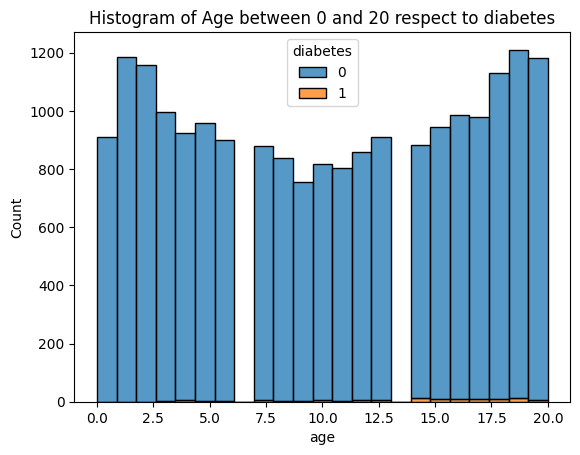

In [258]:
Age_0_20 = dataset[(dataset['age'] >= 0) & (dataset['age'] <= 20)]
sns.histplot(data = Age_0_20, x = 'age', hue = 'diabetes', multiple="stack")
plt.title('Histogram of Age between 0 and 20 respect to diabetes')
plt.show()

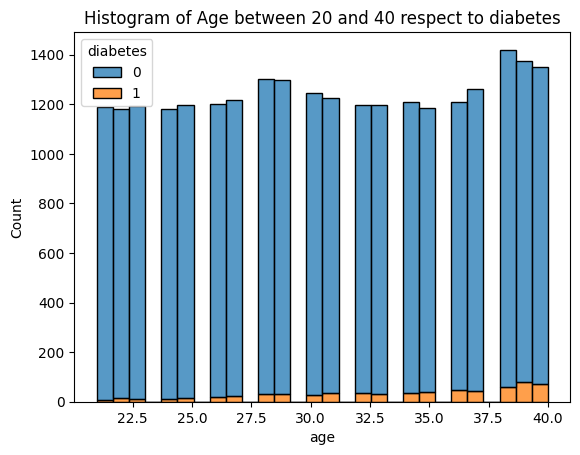

In [259]:
Age_20_40 = dataset[(dataset['age'] > 20) & (dataset['age'] <= 40)]
sns.histplot(data = Age_20_40, x = 'age', hue = 'diabetes', multiple="stack")
plt.title('Histogram of Age between 20 and 40 respect to diabetes')
plt.show()

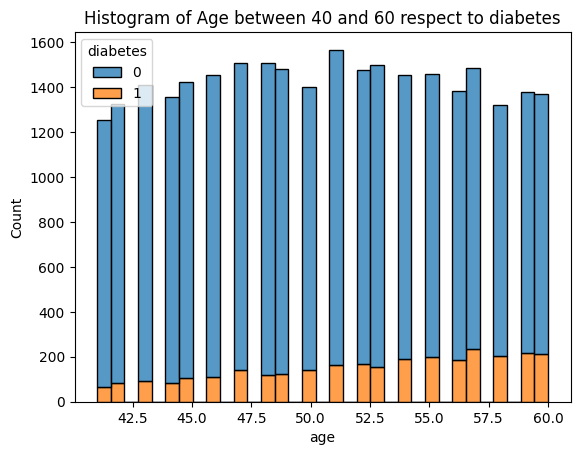

In [260]:
Age_40_60 = dataset[(dataset['age'] > 40) & (dataset['age'] <= 60)]
sns.histplot(data = Age_40_60, x = 'age', hue = 'diabetes', multiple="stack")
plt.title('Histogram of Age between 40 and 60 respect to diabetes')
plt.show()

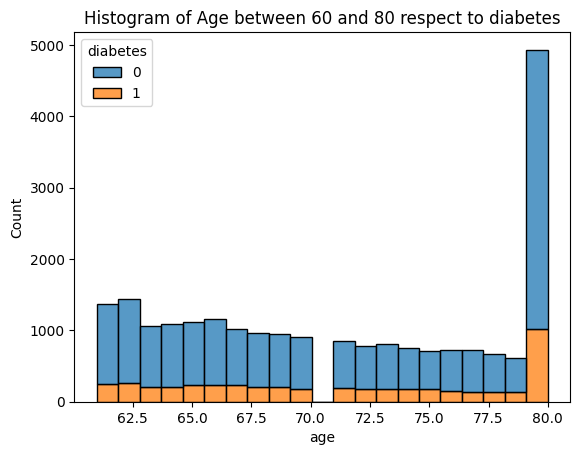

In [261]:
Age_60_80 = dataset[(dataset['age'] > 60) & (dataset['age'] <= 80)]
sns.histplot(data = Age_60_80, x = 'age', hue = 'diabetes', multiple="stack")
plt.title('Histogram of Age between 60 and 80 respect to diabetes')
plt.show()

# Checking outliers.

---



---



## Normality check for age.

---



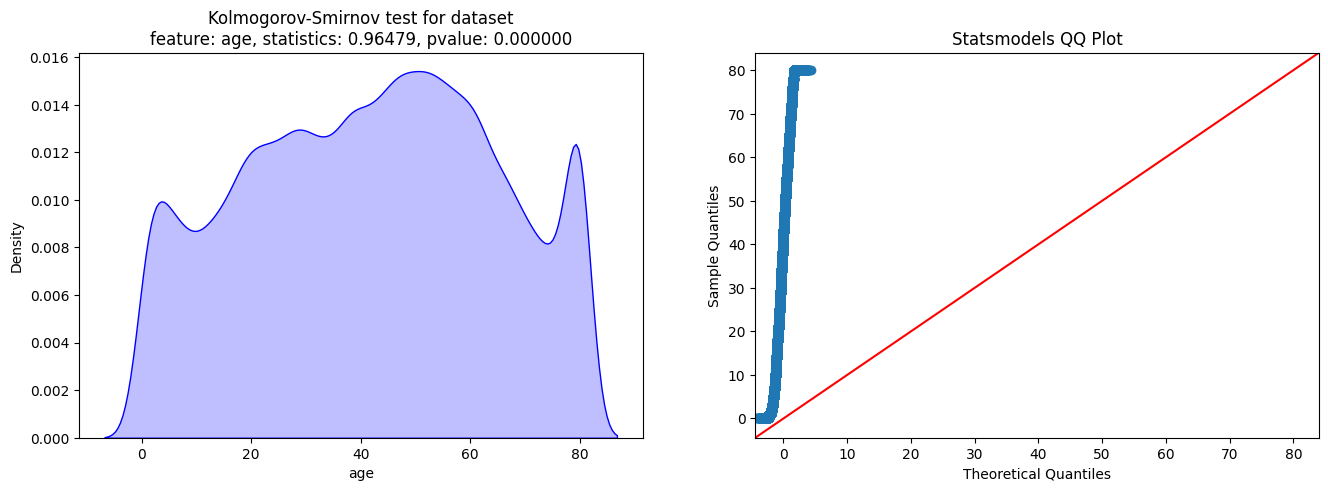

In [262]:
statistic, pvalue = kstest(dataset['age'], 'norm')

fig, axes = plt.subplots(1, 2, figsize=(16,5))
axes[0].set_title("Kolmogorov-Smirnov test for dataset\n"
                  "feature: {}, statistics: {:.5f}, pvalue: {:5f}".format('age', statistic, pvalue))
sns.kdeplot(dataset['age'], color='blue', fill=True, ax=axes[0])

sm.qqplot(dataset['age'], line='45', ax=axes[1])
axes[1].set_title("Statsmodels QQ Plot")

plt.show()

## Normality check for bmi.

---



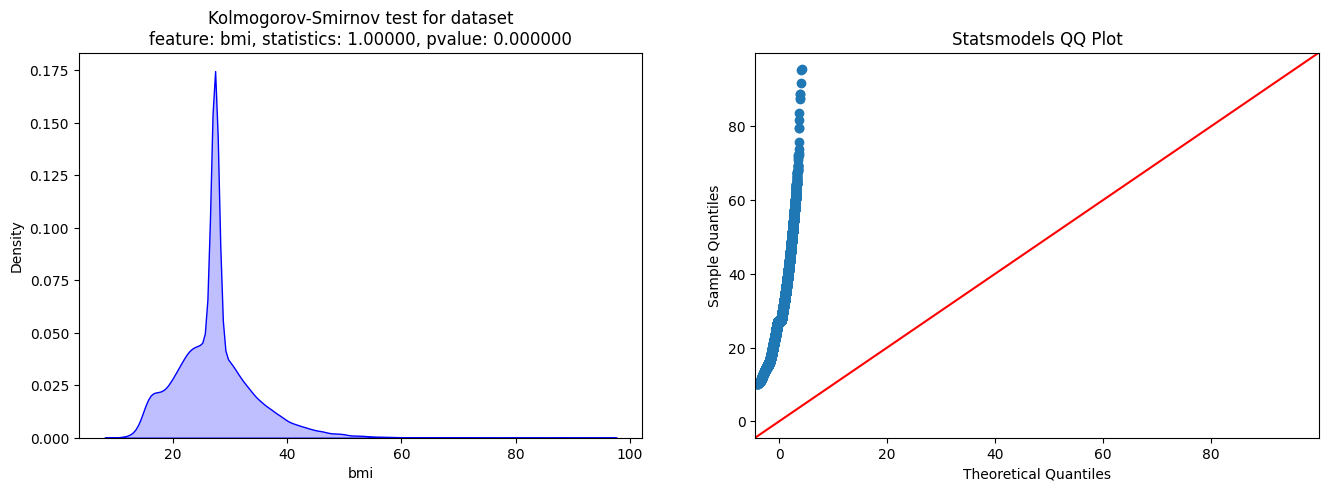

In [263]:
statistic, pvalue = kstest(dataset['bmi'], 'norm')

fig, axes = plt.subplots(1, 2, figsize=(16,5))
axes[0].set_title("Kolmogorov-Smirnov test for dataset\n"
                  "feature: {}, statistics: {:.5f}, pvalue: {:5f}".format('bmi', statistic, pvalue))
sns.kdeplot(dataset['bmi'], color='blue', fill=True, ax=axes[0])

sm.qqplot(dataset['bmi'], line='45', ax=axes[1])
axes[1].set_title("Statsmodels QQ Plot")

plt.show()

## Normality check for HbA1c_level.

---



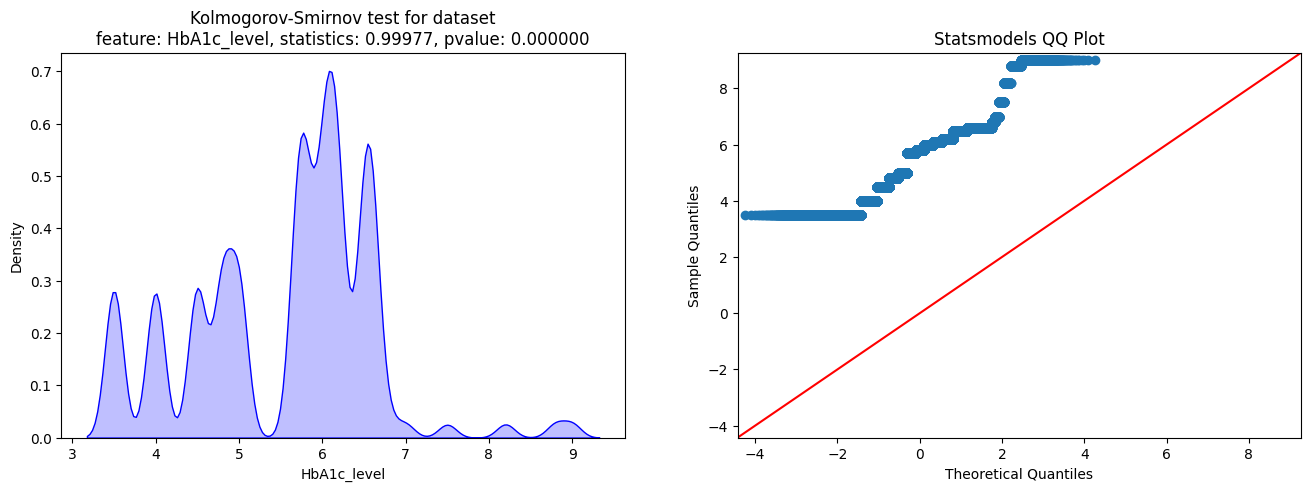

In [264]:
statistic, pvalue = kstest(dataset['HbA1c_level'], 'norm')

fig, axes = plt.subplots(1, 2, figsize=(16,5))
axes[0].set_title("Kolmogorov-Smirnov test for dataset\n"
                  "feature: {}, statistics: {:.5f}, pvalue: {:5f}".format('HbA1c_level', statistic, pvalue))
sns.kdeplot(dataset['HbA1c_level'], color='blue', fill=True, ax=axes[0])

sm.qqplot(dataset['HbA1c_level'], line='45', ax=axes[1])
axes[1].set_title("Statsmodels QQ Plot")

plt.show()

## Normality check for blood_glucose_level.

---



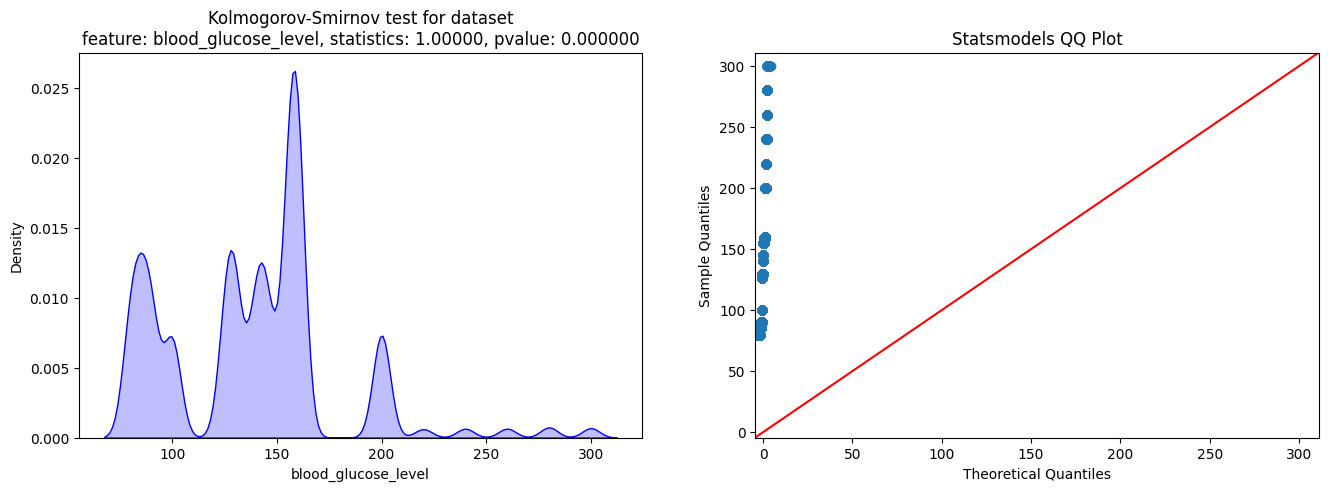

In [265]:
statistic, pvalue = kstest(dataset['blood_glucose_level'], 'norm')

fig, axes = plt.subplots(1, 2, figsize=(16,5))
axes[0].set_title("Kolmogorov-Smirnov test for dataset\n"
                  "feature: {}, statistics: {:.5f}, pvalue: {:5f}".format('blood_glucose_level', statistic, pvalue))
sns.kdeplot(dataset['blood_glucose_level'], color='blue', fill=True, ax=axes[0])

sm.qqplot(dataset['blood_glucose_level'], line='45', ax=axes[1])
axes[1].set_title("Statsmodels QQ Plot")

plt.show()

## Removing outliers.

---



In [266]:
trimmer = Winsorizer(
  variables = ["age", "bmi", "HbA1c_level", "blood_glucose_level"],
  capping_method="iqr",
  tail="both",
  fold=1.5,
)

In [267]:
trimmer.fit(dataset)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

In [268]:
dataset = trimmer.transform(dataset)

### Checking outlier remove or not.

---



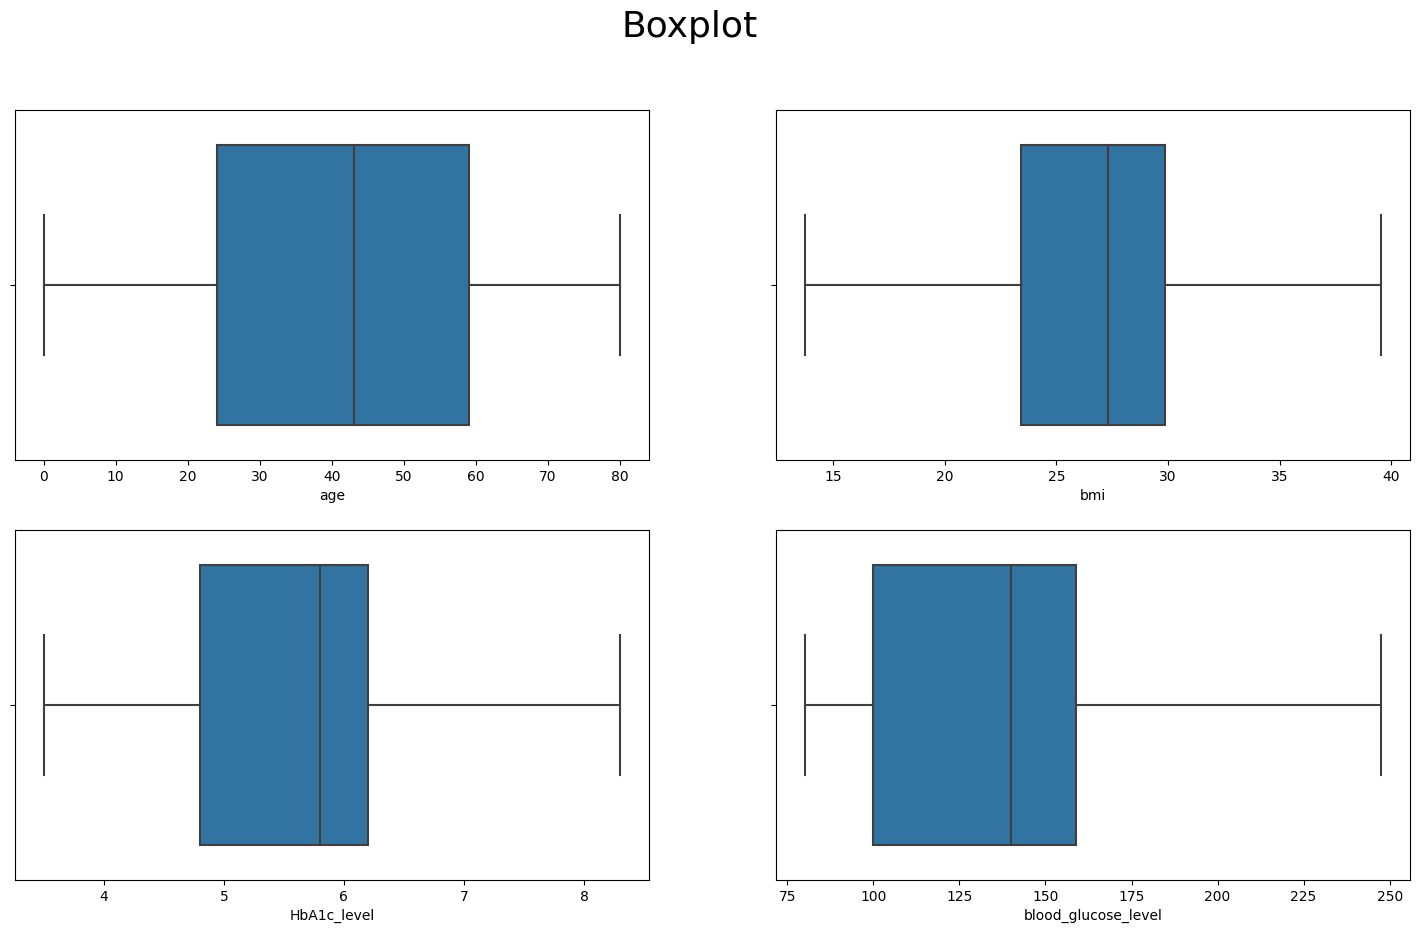

In [269]:
col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(2, 2, figsize=(18, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.boxplot(data = dataset, x = col[i], ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Boxplot", fontsize=26)
plt.show()

In [270]:
dataset.shape

(96128, 9)

In [271]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.786046,0.077615,0.040810,27.030874,5.524452,137.523224,0.088237
std,22.482594,0.267567,0.197851,5.919950,1.049488,38.640718,0.283640
min,0.000000,0.000000,0.000000,13.710000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,39.550000,8.300000,247.500000,1.000000


# Fix imblanced data.

---



---

In [272]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# Scaling the data.

---



---



In [273]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

# Building model.

---



---



In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifer.

---



In [275]:
RFC = RandomForestClassifier(max_depth= 10, min_samples_leaf= 5, min_samples_split= 5, n_estimators= 150)

In [276]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
RFC_Classifier = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RFC)])

In [277]:
RFC_Classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=5,
                                        min_samples_split=5,
                                        n_estimators=150))])

Model Accuracy:  0.9491313845833766
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



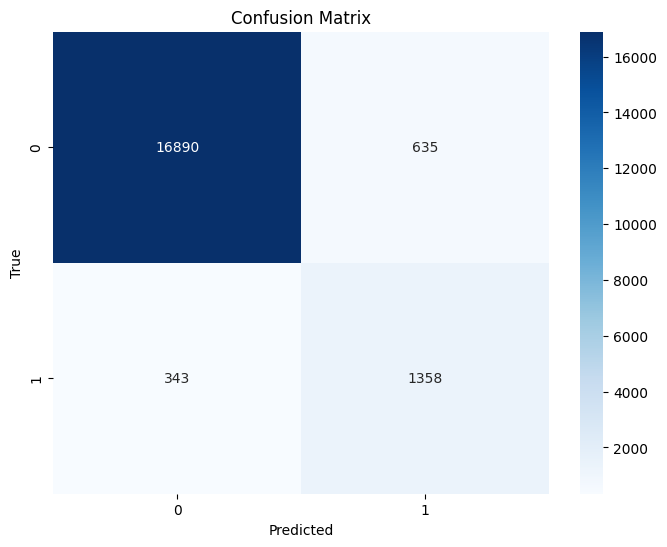

In [278]:
# Predict on the test set using the best model
y_pred = RFC_Classifier.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                        Feature  Importance
2                   HbA1c_level    0.443398
3           blood_glucose_level    0.323633
0                           age    0.123185
1                           BMI    0.058077
4                  hypertension    0.027419
5                 heart_disease    0.015032
9    smoking_history_non_smoker    0.003125
10  smoking_history_past_smoker    0.002208
6                 gender_Female    0.001661
7                   gender_Male    0.001621
8       smoking_history_current    0.000641


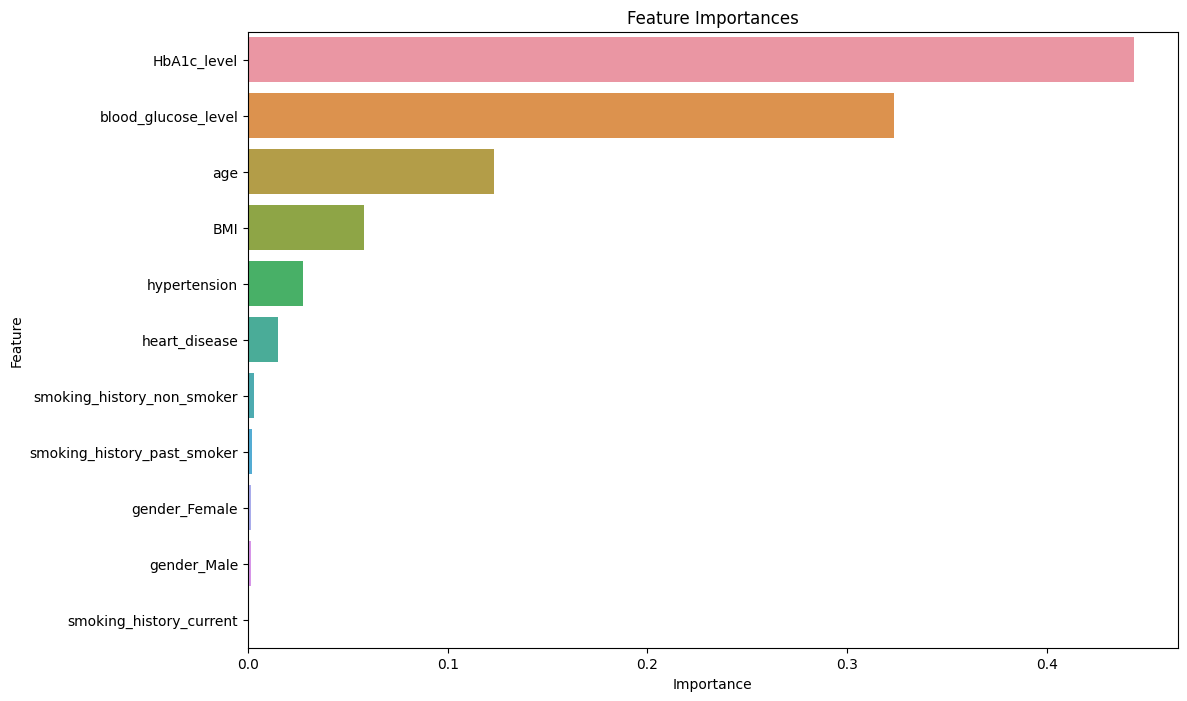

In [279]:
# After fitting the model, we input feature names
onehot_columns = list(RFC_Classifier.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = RFC_Classifier.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

>1, train: 0.951, test: 0.949
>2, train: 0.971, test: 0.969
>3, train: 0.971, test: 0.969
>4, train: 0.970, test: 0.968
>5, train: 0.967, test: 0.966
>6, train: 0.966, test: 0.964
>7, train: 0.964, test: 0.961
>8, train: 0.952, test: 0.949
>9, train: 0.955, test: 0.952
>10, train: 0.952, test: 0.948
>11, train: 0.951, test: 0.947
>12, train: 0.956, test: 0.949
>13, train: 0.957, test: 0.948
>14, train: 0.957, test: 0.946
>15, train: 0.958, test: 0.945
>16, train: 0.959, test: 0.943
>17, train: 0.959, test: 0.938
>18, train: 0.959, test: 0.938
>19, train: 0.960, test: 0.937
>20, train: 0.962, test: 0.941


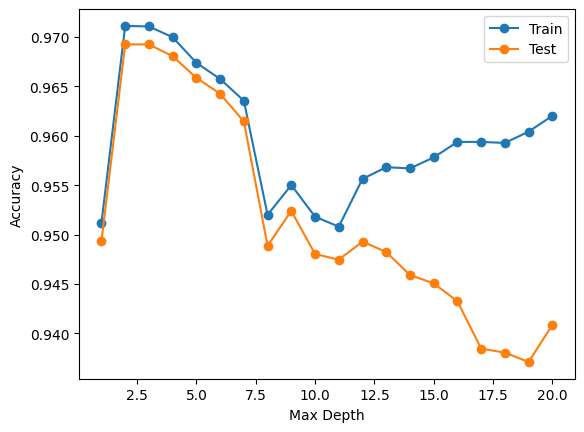

In [280]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
  model = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier(max_depth = i))])
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Xtream Gradient Boosting Classifer.

---



In [281]:
XGB = XGBClassifier()

In [282]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
XGB_Classifier = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', XGB)])

In [283]:
XGB_Classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier',
                 XGBClassifier(base_s...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Model Accuracy:  0.9374804951628004
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     17525
           1       0.61      0.82      0.70      1701

    accuracy                           0.94     19226
   macro avg       0.80      0.89      0.83     19226
weighted avg       0.95      0.94      0.94     19226



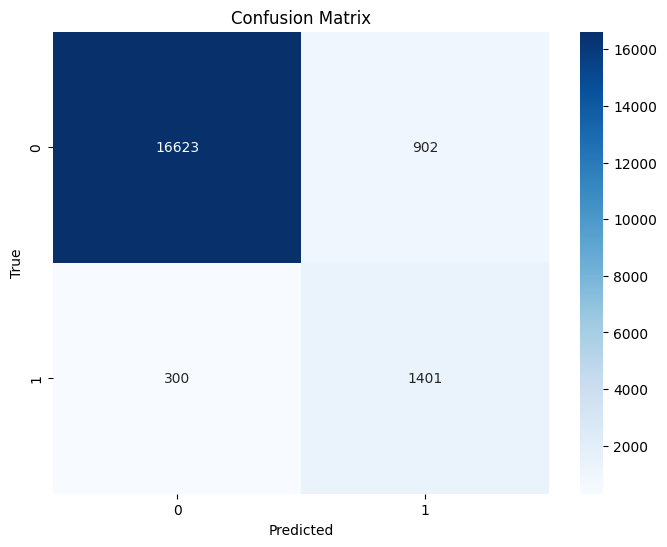

In [284]:
# Predict on the test set using the best model
y_pred = XGB_Classifier.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                        Feature  Importance
2                   HbA1c_level    0.487066
3           blood_glucose_level    0.280148
5                 heart_disease    0.057768
4                  hypertension    0.052212
0                           age    0.045368
1                           BMI    0.019256
9    smoking_history_non_smoker    0.015991
6                 gender_Female    0.015913
10  smoking_history_past_smoker    0.013549
8       smoking_history_current    0.012729
7                   gender_Male    0.000000


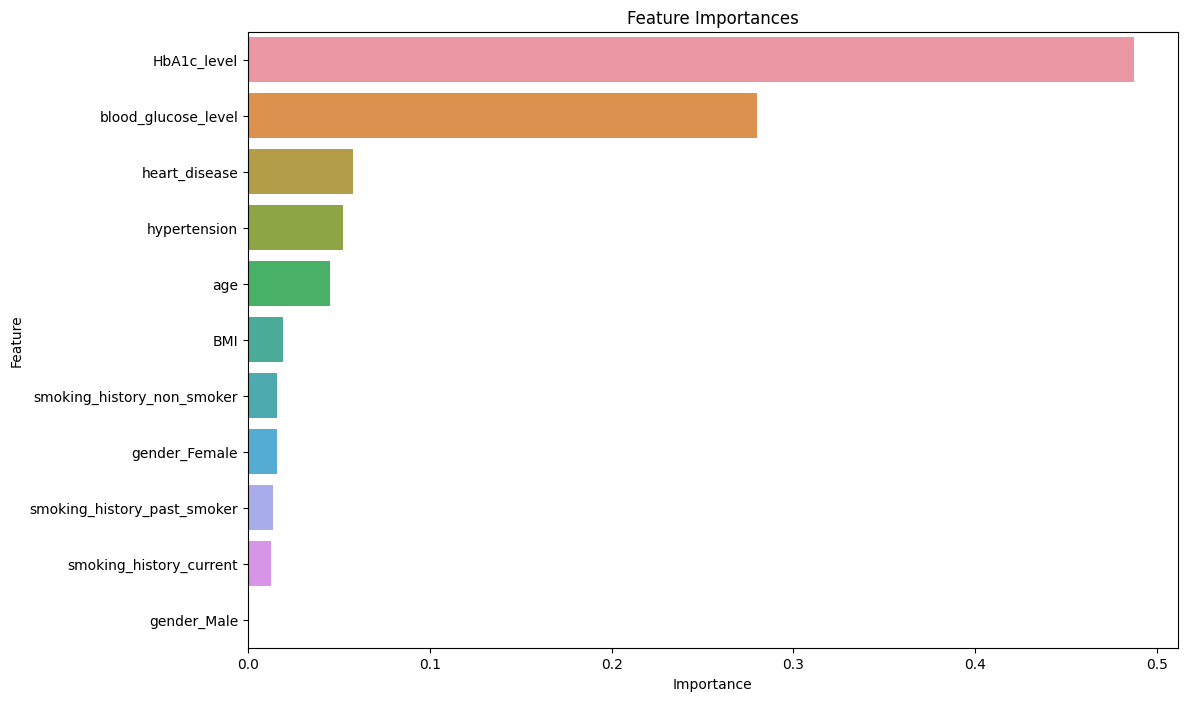

In [285]:
# After fitting the model, we input feature names
onehot_columns = list(XGB_Classifier.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = XGB_Classifier.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

>0, train: 0.957, test: 0.955
>0, train: 0.954, test: 0.953
>0, train: 0.953, test: 0.950
>0, train: 0.948, test: 0.946
>0, train: 0.946, test: 0.943
>0, train: 0.946, test: 0.943
>0, train: 0.948, test: 0.938
>0, train: 0.949, test: 0.934
>0, train: 0.951, test: 0.936
>0, train: 0.949, test: 0.932
>0, train: 0.949, test: 0.931
>0, train: 0.950, test: 0.928


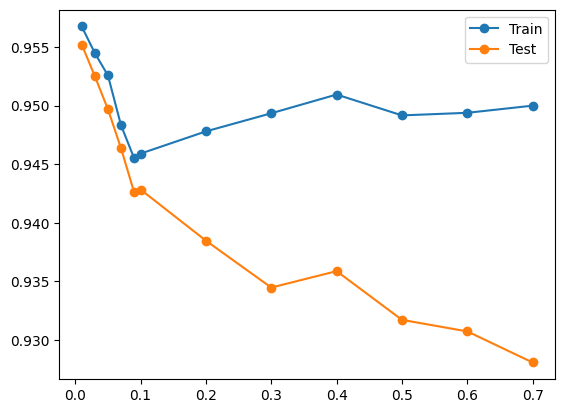

In [286]:
train_scores, test_scores = list(), list()
values = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for i in values:
  model = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', XGBClassifier(learning_rate = i))])
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## Decision Tree Classifier.

---



In [287]:
DCT = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 5, min_samples_split= 5)

In [288]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
DCT_Classifier = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', DCT)])

In [289]:
DCT_Classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,
                                        min_samples_split=5))])

Model Accuracy:  0.9386247789451784
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     17525
           1       0.62      0.82      0.70      1701

    accuracy                           0.94     19226
   macro avg       0.80      0.88      0.83     19226
weighted avg       0.95      0.94      0.94     19226



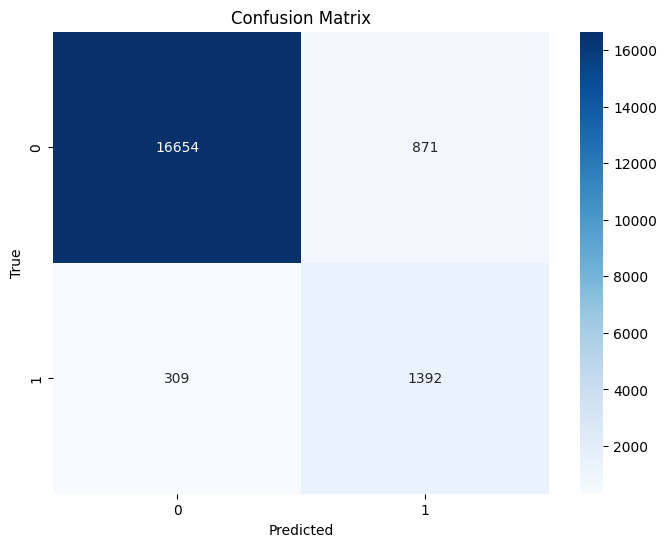

In [290]:
# Predict on the test set using the best model
y_pred = DCT_Classifier.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                        Feature  Importance
2                   HbA1c_level    0.548671
3           blood_glucose_level    0.336967
0                           age    0.070850
1                           BMI    0.031887
4                  hypertension    0.005400
5                 heart_disease    0.004338
7                   gender_Male    0.000755
8       smoking_history_current    0.000405
9    smoking_history_non_smoker    0.000291
10  smoking_history_past_smoker    0.000263
6                 gender_Female    0.000174


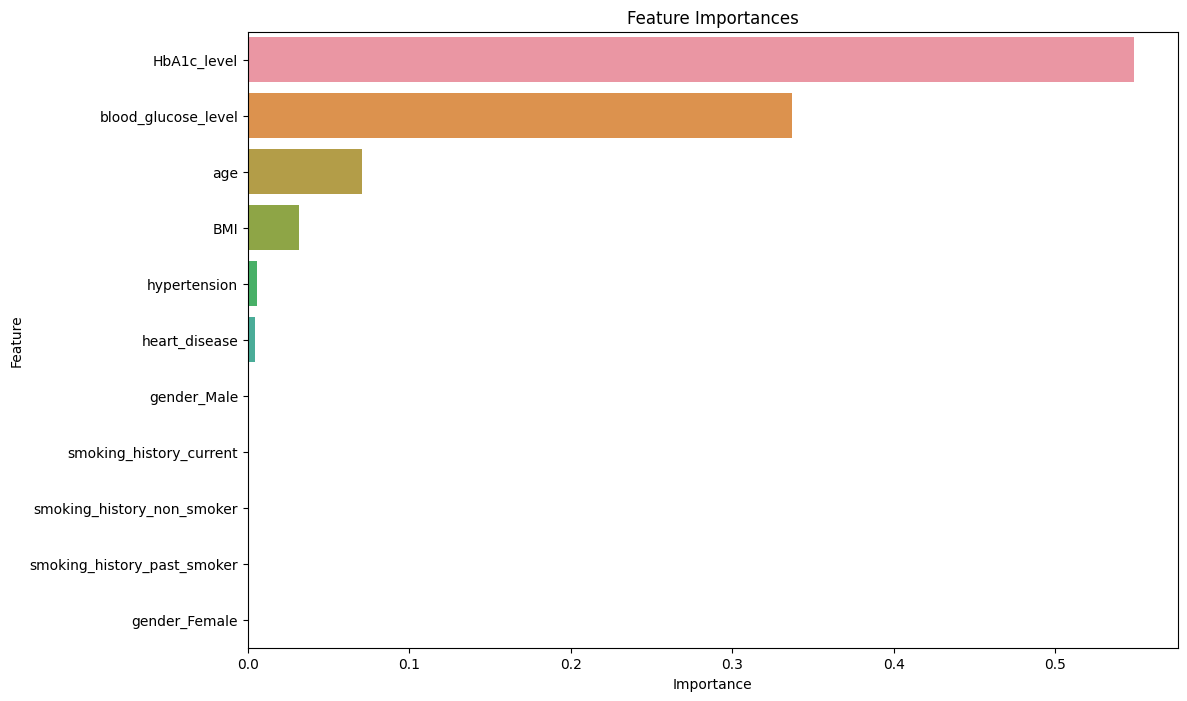

In [291]:
# After fitting the model, we input feature names
onehot_columns = list(DCT_Classifier.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = DCT_Classifier.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

>1, train: 0.953, test: 0.951
>2, train: 0.971, test: 0.969
>3, train: 0.971, test: 0.969
>4, train: 0.971, test: 0.969
>5, train: 0.971, test: 0.969
>6, train: 0.961, test: 0.959
>7, train: 0.955, test: 0.953
>8, train: 0.940, test: 0.936
>9, train: 0.946, test: 0.944
>10, train: 0.948, test: 0.944
>11, train: 0.944, test: 0.940
>12, train: 0.943, test: 0.936
>13, train: 0.942, test: 0.934
>14, train: 0.946, test: 0.937
>15, train: 0.940, test: 0.925
>16, train: 0.942, test: 0.922
>17, train: 0.943, test: 0.923
>18, train: 0.939, test: 0.916
>19, train: 0.945, test: 0.921
>20, train: 0.940, test: 0.914


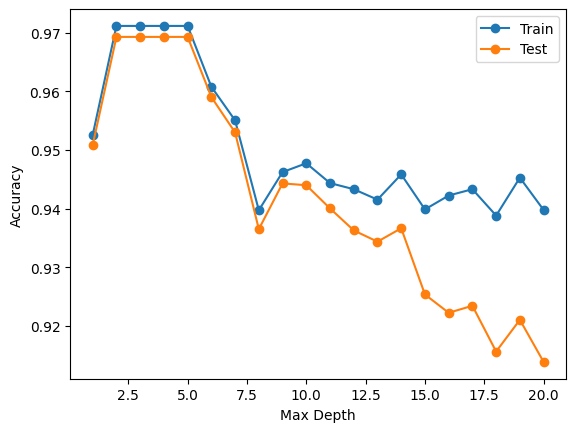

In [292]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
  model = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', DecisionTreeClassifier(max_depth = i))])
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Light Gradient Boosting Classifier.

---



In [293]:
LGB = LGBMClassifier(verbose = -1)

In [294]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
LGB_Classifier = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', LGB)])

In [295]:
LGB_Classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier', LGBMClassifier(verbose=-1))])

Model Accuracy:  0.9403412046187455
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     17525
           1       0.62      0.83      0.71      1701

    accuracy                           0.94     19226
   macro avg       0.80      0.89      0.84     19226
weighted avg       0.95      0.94      0.94     19226



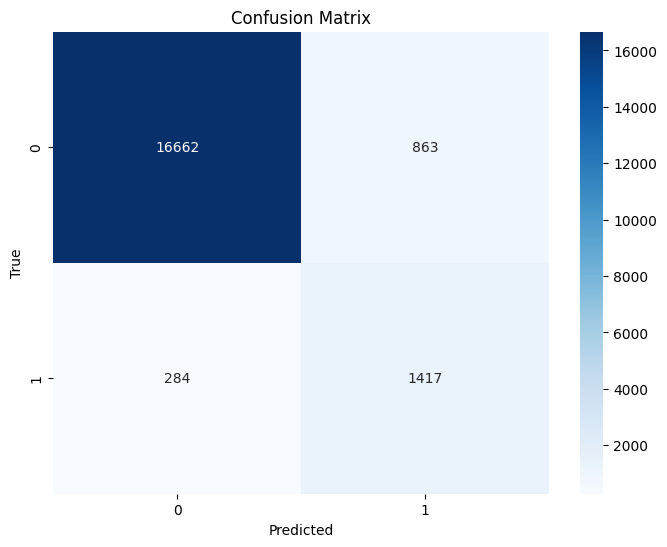

In [296]:
# Predict on the test set using the best model
y_pred = LGB_Classifier.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                        Feature  Importance
1                           BMI         778
0                           age         725
3           blood_glucose_level         590
2                   HbA1c_level         493
6                 gender_Female          98
4                  hypertension          85
5                 heart_disease          68
9    smoking_history_non_smoker          67
10  smoking_history_past_smoker          54
8       smoking_history_current          27
7                   gender_Male          15


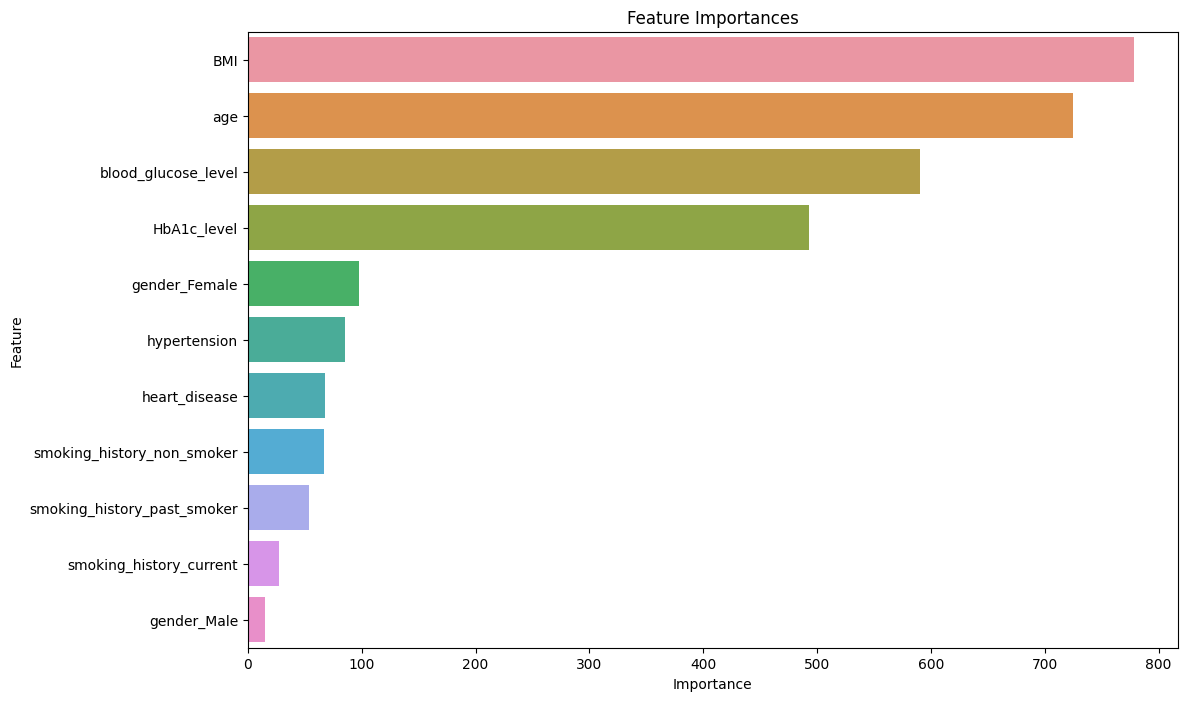

In [297]:
# After fitting the model, we input feature names
onehot_columns = list(LGB_Classifier.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = LGB_Classifier.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

## Gradient Bossting Classifier.

---



In [298]:
GBC = GradientBoostingClassifier()

In [299]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
GBC_Classifier = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', GBC)])

In [300]:
GBC_Classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier', GradientBoostingClassifier())])

Model Accuracy:  0.9452304171434516
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.65      0.83      0.73      1701

    accuracy                           0.95     19226
   macro avg       0.82      0.89      0.85     19226
weighted avg       0.95      0.95      0.95     19226



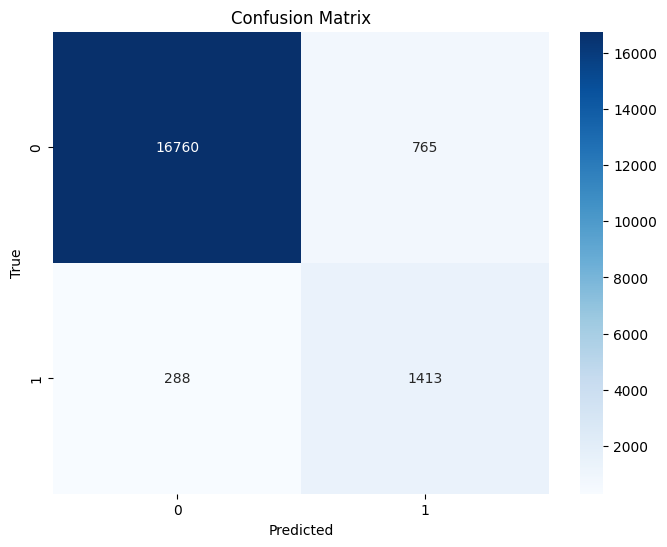

In [301]:
# Predict on the test set using the best model
y_pred = GBC_Classifier.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                        Feature  Importance
2                   HbA1c_level    0.552755
3           blood_glucose_level    0.334086
0                           age    0.083788
1                           BMI    0.021015
4                  hypertension    0.004297
5                 heart_disease    0.003034
9    smoking_history_non_smoker    0.000441
7                   gender_Male    0.000271
6                 gender_Female    0.000245
10  smoking_history_past_smoker    0.000039
8       smoking_history_current    0.000028


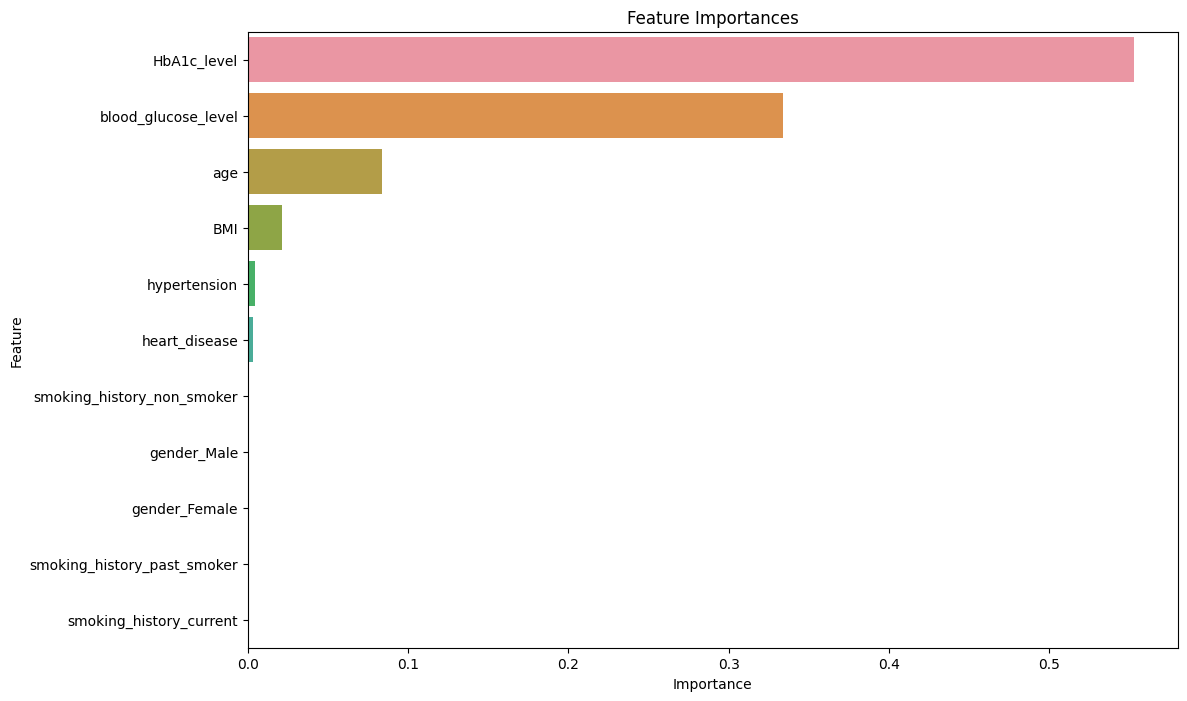

In [302]:
# After fitting the model, we input feature names
onehot_columns = list(GBC_Classifier.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = GBC_Classifier.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

>1, train: 0.963, test: 0.962
>2, train: 0.950, test: 0.948
>3, train: 0.947, test: 0.945
>4, train: 0.944, test: 0.942
>5, train: 0.946, test: 0.944
>6, train: 0.946, test: 0.942
>7, train: 0.948, test: 0.939
>8, train: 0.951, test: 0.938
>9, train: 0.954, test: 0.939
>10, train: 0.954, test: 0.934
>11, train: 0.959, test: 0.937
>12, train: 0.958, test: 0.933
>13, train: 0.958, test: 0.928
>14, train: 0.958, test: 0.932
>15, train: 0.958, test: 0.931
>16, train: 0.956, test: 0.928
>17, train: 0.955, test: 0.928
>18, train: 0.956, test: 0.929
>19, train: 0.956, test: 0.927
>20, train: 0.954, test: 0.924


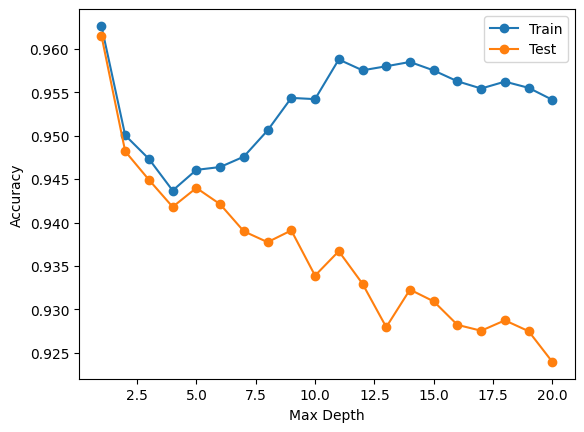

In [303]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
  model = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', GradientBoostingClassifier(max_depth = i))])
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Cat Boosting Classifier.

---



In [304]:
CBC = CatBoostClassifier(verbose=False)

In [305]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
CBC_Classifer = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', CBC)])

In [306]:
CBC_Classifer.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7dd230faffd0>)])

Model Accuracy:  0.9374284822636014
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     17525
           1       0.61      0.83      0.70      1701

    accuracy                           0.94     19226
   macro avg       0.79      0.89      0.83     19226
weighted avg       0.95      0.94      0.94     19226



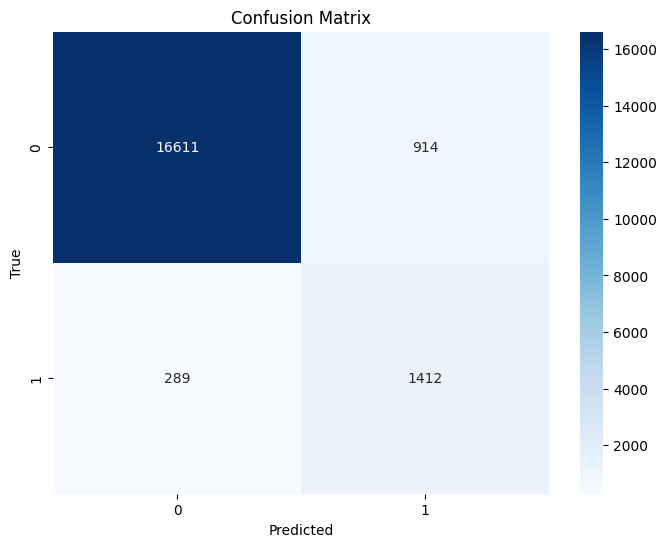

In [307]:
# Predict on the test set using the best model
y_pred = CBC_Classifer.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

                        Feature  Importance
2                   HbA1c_level   46.296748
3           blood_glucose_level   35.774828
0                           age    7.662936
1                           BMI    6.144177
4                  hypertension    0.887134
5                 heart_disease    0.867972
6                 gender_Female    0.563014
7                   gender_Male    0.552500
9    smoking_history_non_smoker    0.492275
10  smoking_history_past_smoker    0.412367
8       smoking_history_current    0.346050


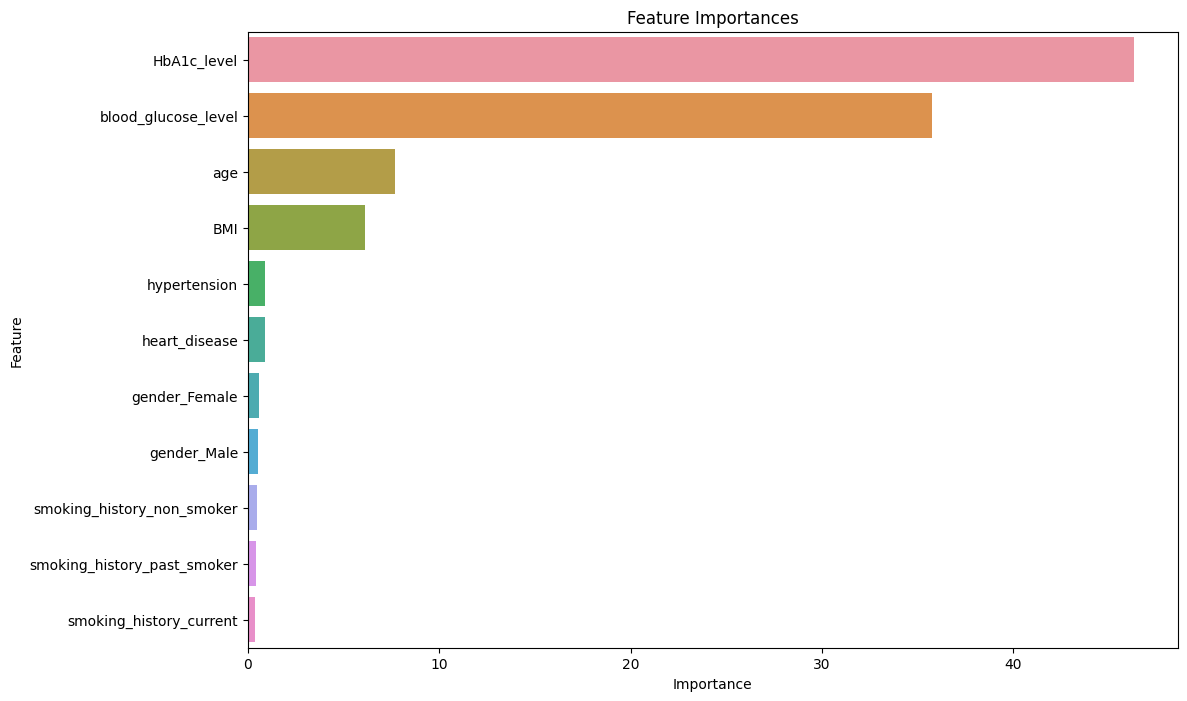

In [308]:
# After fitting the model, we input feature names
onehot_columns = list(CBC_Classifer.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['gender', 'smoking_history']))

# Then we add the numeric feature names
feature_names = ['age', 'BMI', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease'] + onehot_columns

# And now let's get the feature importances
importances = CBC_Classifer.named_steps['classifier'].feature_importances_

# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

>1, train: 0.950, test: 0.948
>2, train: 0.945, test: 0.941
>3, train: 0.946, test: 0.942
>4, train: 0.947, test: 0.942
>5, train: 0.947, test: 0.940
>6, train: 0.949, test: 0.939
>7, train: 0.951, test: 0.938
>8, train: 0.953, test: 0.936
>9, train: 0.955, test: 0.934
>10, train: 0.957, test: 0.935


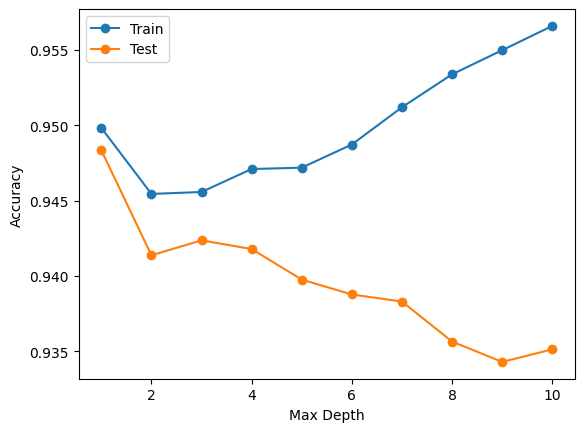

In [309]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 11)]
for i in values:
  model = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', CatBoostClassifier(max_depth = i, verbose=False))])
  model.fit(X_train, y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Support Vector Classifier.

---



In [310]:
SVM = SVC(kernel='rbf')

In [311]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
SVM_Classifier = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', SVM)])

In [312]:
SVM_Classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier', SVC())])

Model Accuracy:  0.9367523145740143
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     17525
           1       0.61      0.80      0.69      1701

    accuracy                           0.94     19226
   macro avg       0.79      0.88      0.83     19226
weighted avg       0.95      0.94      0.94     19226



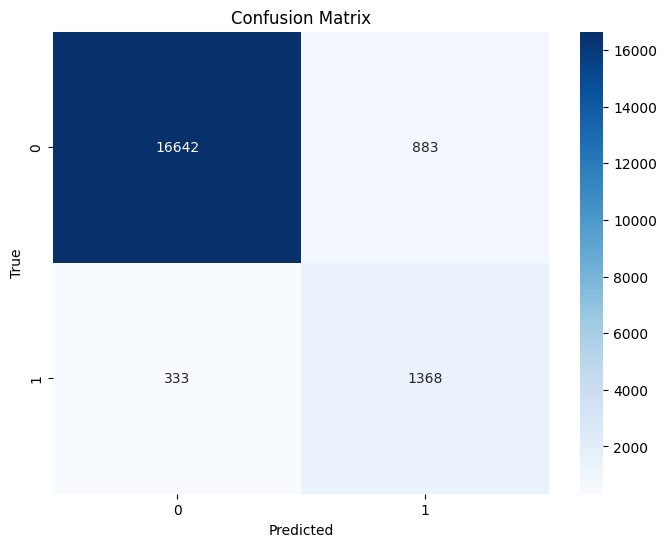

In [313]:
# Predict on the test set using the best model
y_pred = SVM_Classifier.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## K Neighbour Classifier.

---



In [314]:
KNN = KNeighborsClassifier(n_neighbors = 3)

In [315]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
KNN_Classifier = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', KNN)])

In [316]:
KNN_Classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'smoking_history'])])),
                ('over', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

Model Accuracy:  0.9130344325392697
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     17525
           1       0.51      0.80      0.62      1701

    accuracy                           0.91     19226
   macro avg       0.74      0.86      0.79     19226
weighted avg       0.94      0.91      0.92     19226



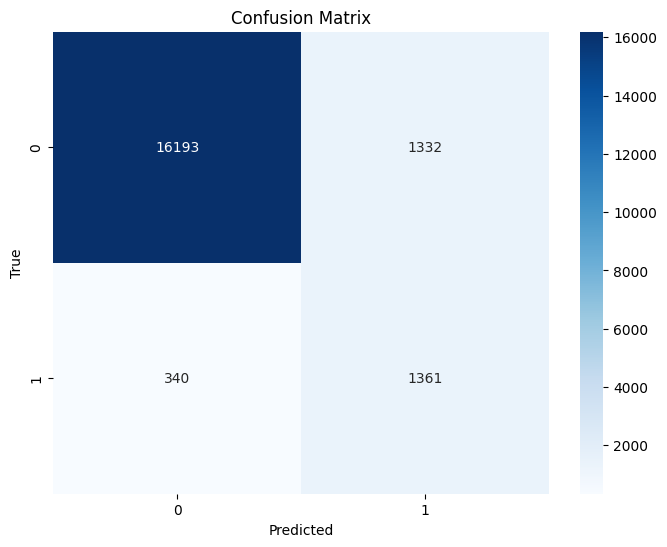

In [317]:
# Predict on the test set using the best model
y_pred = KNN_Classifier.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# AUC and ROC Curve.

---



---



In [318]:
pred_prob1 = RFC_Classifier.predict_proba(X_test)
pred_prob2 = XGB_Classifier.predict_proba(X_test)
pred_prob3 = DCT_Classifier.predict_proba(X_test)
pred_prob4 = LGB_Classifier.predict_proba(X_test)
pred_prob5 = CBC_Classifer.predict_proba(X_test)
pred_prob6 = KNN_Classifier.predict_proba(X_test)

In [319]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [320]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])

print(f"AUC Score of Random Forest Classifier : {auc_score1}. \nAUC Score of Xtream Gradient Boosting : {auc_score2}. \nAUC Score of Decision Tree Classifier : {auc_score3}. \nAUC Score of Light Gradient Boosting Classifer : {auc_score4}. \nAUC Score of Cat Boosting classifier : {auc_score5}. \nAUC Score of K Neighbor clssifier : {auc_score6}.")

AUC Score of Random Forest Classifier : 0.9732452924813045. 
AUC Score of Xtream Gradient Boosting : 0.974820685323142. 
AUC Score of Decision Tree Classifier : 0.9720113284037837. 
AUC Score of Light Gradient Boosting Classifer : 0.976242790806113. 
AUC Score of Cat Boosting classifier : 0.9765097312061964. 
AUC Score of K Neighbor clssifier : 0.9246131125351286.


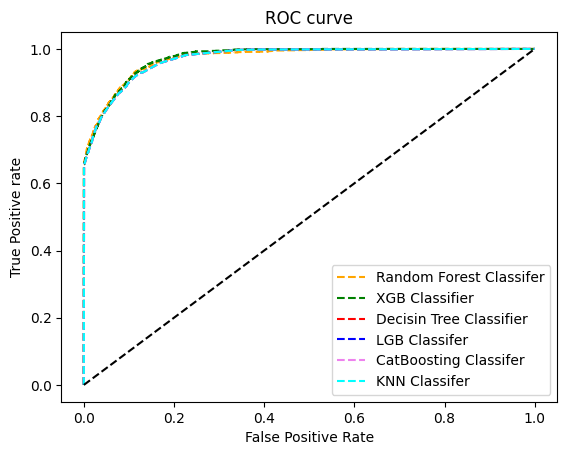

In [321]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest Classifer')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGB Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decisin Tree Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='LGB Classifer')
plt.plot(fpr6, tpr6, linestyle='--',color='violet', label='CatBoosting Classifer')
plt.plot(fpr5, tpr5, linestyle='--',color='aqua', label='KNN Classifer')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();